<a href="https://colab.research.google.com/github/Aitslab/BioNLP/blob/master/evaluation_scripts/NERevaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of NER evaluation scripts
author: Sonja Aits

This notebook serves to illustrate differences between NER evaluation approaches.
The BioBERT evaluation script calculates metrics using seqeval (in default mode) which returns entity-level metrics.
In contrast scikit learn returns token-level metrics.

In [ ]:
# install seqeval
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=b67c928393eb178369bd51ecb17e820000ec0aca3bed5a6ec0c18fa6b9593963
  Stored in directory: /root/.cache/pip/wheels/e2/a5/92/2c80d1928733611c2747a9820e1324a6835524d9411510c142
Successfully built seqeval


In [91]:
from seqeval.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix as sk_cm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report as sk_classification_report

In [124]:
# evaluation with two entity classes

y_true = [['O', 'B-TAXON', 'I-TAXON', 'O', 'O', 'B-CL', 'B-CL']]
y_pred = [['O', 'B-TAXON', 'I-TAXON', 'O', 'O', 'B-CL', 'O']]

print('seqeval metrics')
print('Precision: '+str(precision_score(y_true, y_pred)))
print('Recall: '+str(recall_score(y_true, y_pred)))
print('F1: '+str(f1_score(y_true, y_pred)))
print(classification_report(y_true, y_pred))

seqeval metrics
Precision: 1.0
Recall: 0.6666666666666666
F1: 0.8
              precision    recall  f1-score   support

          CL       1.00      0.50      0.67         2
       TAXON       1.00      1.00      1.00         1

   micro avg       1.00      0.67      0.80         3
   macro avg       1.00      0.75      0.83         3
weighted avg       1.00      0.67      0.78         3



seqeval metrics
Precision: 0.5
Recall: 0.5
F1: 0.5
              precision    recall  f1-score   support

           _       0.50      0.50      0.50         2

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2

-------------------------------------
sklearn metrics
              precision    recall  f1-score   support

           B       1.00      1.00      1.00         2
           I       0.00      0.00      0.00         1
           O       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


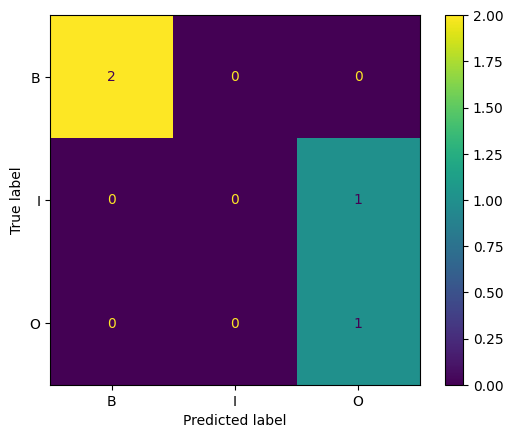

In [125]:
# evaluation with one entity class, one truncated entity (I to O)
y_true = [['O', 'B', 'I', 'B']]
y_pred = [['O', 'B', 'O', 'B']]

print('seqeval metrics')
print('Precision: '+str(precision_score(y_true, y_pred)))
print('Recall: '+str(recall_score(y_true, y_pred)))
print('F1: '+str(f1_score(y_true, y_pred)))
print(classification_report(y_true, y_pred))

y_true_flattened = ['O', 'B', 'I', 'B']
y_pred_flattened = ['O', 'B', 'O', 'B']

print('-------------------------------------')

print('sklearn metrics')
print(sk_classification_report(y_true_flattened, y_pred_flattened, labels=['B','I','O']))
cm = sk_cm(y_true_flattened, y_pred_flattened, labels=['B','I','O'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['B','I','O'])
disp.plot()

In [109]:
# evaluation with one entity class, one partial match (I to O)

TP = 1
FP = 1
FN = 1

precision = TP/(TP+FP)
print(precision)

recall = TP/(TP+FN)
print(recall)

0.5
0.5


seqeval metrics
Precision: 0.3333333333333333
Recall: 0.5
F1: 0.4
              precision    recall  f1-score   support

           _       0.33      0.50      0.40         2

   micro avg       0.33      0.50      0.40         2
   macro avg       0.33      0.50      0.40         2
weighted avg       0.33      0.50      0.40         2

-------------------------------------
sklearn metrics
              precision    recall  f1-score   support

           B       0.67      1.00      0.80         2
           I       0.00      0.00      0.00         1
           O       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


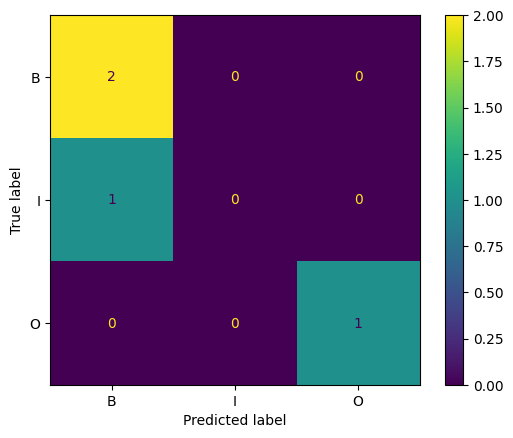

In [112]:
# evaluation with one entity class, one partial match wrongly predicted as additional entity (I to B)
y_true = [['O', 'B', 'I', 'B']]
y_pred = [['O', 'B', 'B', 'B']]

print('seqeval metrics')
print('Precision: '+str(precision_score(y_true, y_pred)))
print('Recall: '+str(recall_score(y_true, y_pred)))
print('F1: '+str(f1_score(y_true, y_pred)))
print(classification_report(y_true, y_pred))

y_true_flattened = ['O', 'B', 'I', 'B']
y_pred_flattened = ['O', 'B', 'B', 'B']

print('-------------------------------------')

print('sklearn metrics')
print(sk_classification_report(y_true_flattened, y_pred_flattened, labels=['B','I','O']))
cm = sk_cm(y_true_flattened, y_pred_flattened, labels=['B','I','O'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['B','I','O'])
disp.plot()

In [113]:
# evaluation with one entity class, one partial match wrongly predicted as additional entity (I to B)

TP = 1
FP = 2
FN = 1

precision = TP/(TP+FP)
print(precision)

recall = TP/(TP+FN)
print(recall)

0.3333333333333333
0.5


seqeval metrics
Precision: 1.0
Recall: 0.5
F1: 0.6666666666666666
              precision    recall  f1-score   support

           _       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2

-------------------------------------
sklearn metrics
              precision    recall  f1-score   support

           B       1.00      0.50      0.67         2
           I       1.00      1.00      1.00         1
           O       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4



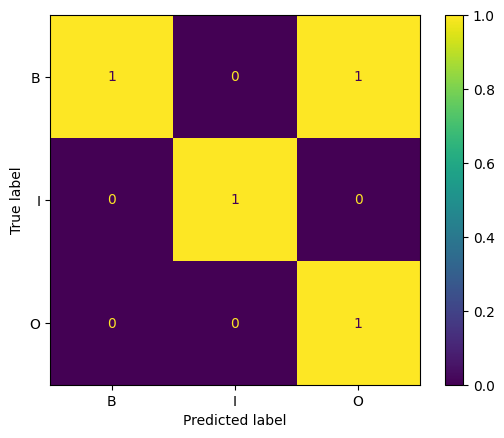

In [114]:
# evaluation with one entity class, one single token entity missed (B to O)
y_true = [['O', 'B', 'I', 'B']]
y_pred = [['O', 'B', 'I', 'O']]

print('seqeval metrics')
print('Precision: '+str(precision_score(y_true, y_pred)))
print('Recall: '+str(recall_score(y_true, y_pred)))
print('F1: '+str(f1_score(y_true, y_pred)))
print(classification_report(y_true, y_pred))

y_true_flattened = ['O', 'B', 'I', 'B']
y_pred_flattened = ['O', 'B', 'I', 'O']

print('-------------------------------------')

print('sklearn metrics')
print(sk_classification_report(y_true_flattened, y_pred_flattened, labels=['B','I','O']))
cm = sk_cm(y_true_flattened, y_pred_flattened, labels=['B','I','O'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['B','I','O'])
disp.plot()

In [115]:
# evaluation with one entity class, one single token entity missed (B to O)

TP = 1
FP = 0
FN = 1

precision = TP/(TP+FP)
print(precision)

recall = TP/(TP+FN)
print(recall)

1.0
0.5


seqeval metrics
Precision: 1.0
Recall: 0.5
F1: 0.6666666666666666
              precision    recall  f1-score   support

           _       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2

-------------------------------------
sklearn metrics
              precision    recall  f1-score   support

           B       1.00      0.50      0.67         2
           I       0.00      0.00      0.00         1
           O       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.44      0.50      0.39         4
weighted avg       0.58      0.50      0.46         4



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


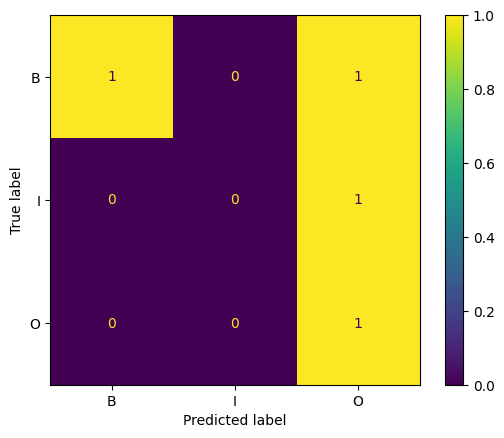

In [116]:
# evaluation with one entity class, one two-token entity missed (B-I to O-O)
y_true = [['O', 'B', 'I', 'B']]
y_pred = [['O', 'O', 'O', 'B']]

print('seqeval metrics')
print('Precision: '+str(precision_score(y_true, y_pred)))
print('Recall: '+str(recall_score(y_true, y_pred)))
print('F1: '+str(f1_score(y_true, y_pred)))
print(classification_report(y_true, y_pred))

y_true_flattened = ['O', 'B', 'I', 'B']
y_pred_flattened = ['O', 'O', 'O', 'B']

print('-------------------------------------')

print('sklearn metrics')
print(sk_classification_report(y_true_flattened, y_pred_flattened, labels=['B','I','O']))
cm = sk_cm(y_true_flattened, y_pred_flattened, labels=['B','I','O'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['B','I','O'])
disp.plot()

seqeval metrics
Precision: 0.6666666666666666
Recall: 1.0
F1: 0.8
              precision    recall  f1-score   support

           _       0.67      1.00      0.80         2

   micro avg       0.67      1.00      0.80         2
   macro avg       0.67      1.00      0.80         2
weighted avg       0.67      1.00      0.80         2

-------------------------------------
sklearn metrics
              precision    recall  f1-score   support

           B       0.67      1.00      0.80         2
           I       1.00      1.00      1.00         1
           O       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


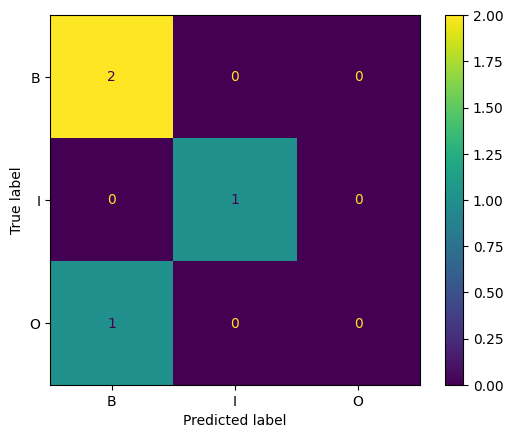

In [121]:
# evaluation with one entity class, extra entity predicted
y_true = [['O', 'B', 'I', 'B']]
y_pred = [['B', 'B', 'I', 'B']]

print('seqeval metrics')
print('Precision: '+str(precision_score(y_true, y_pred)))
print('Recall: '+str(recall_score(y_true, y_pred)))
print('F1: '+str(f1_score(y_true, y_pred)))
print(classification_report(y_true, y_pred))

y_true_flattened = ['O', 'B', 'I', 'B']
y_pred_flattened = ['B', 'B', 'I', 'B']

print('-------------------------------------')

print('sklearn metrics')
print(sk_classification_report(y_true_flattened, y_pred_flattened, labels=['B','I','O']))
cm = sk_cm(y_true_flattened, y_pred_flattened, labels=['B','I','O'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['B','I','O'])
disp.plot()

In [119]:
# evaluation with one entity class, extra entity predicted

TP = 2
FP = 1
FN = 0

precision = TP/(TP+FP)
print(precision)

recall = TP/(TP+FN)
print(recall)

0.6666666666666666
1.0


seqeval metrics
Precision: 0.5
Recall: 0.5
F1: 0.5
              precision    recall  f1-score   support

           _       0.50      0.50      0.50         2

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2

-------------------------------------
sklearn metrics
              precision    recall  f1-score   support

           B       1.00      1.00      1.00         2
           I       0.50      1.00      0.67         1
           O       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


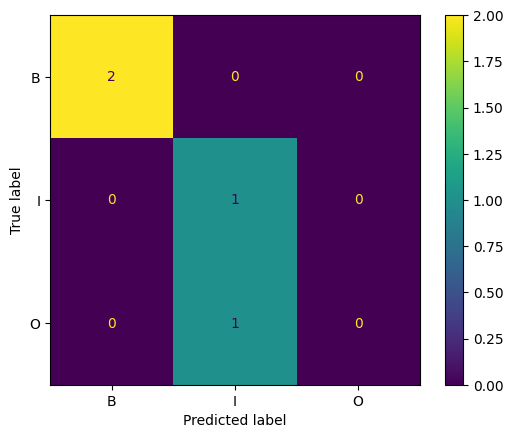

In [122]:
# evaluation with one entity class, entity extended
y_true = [['B', 'I', 'O', 'B']]
y_pred = [['B', 'I', 'I', 'B']]

print('seqeval metrics')
print('Precision: '+str(precision_score(y_true, y_pred)))
print('Recall: '+str(recall_score(y_true, y_pred)))
print('F1: '+str(f1_score(y_true, y_pred)))
print(classification_report(y_true, y_pred))

y_true_flattened = ['B', 'I', 'O', 'B']
y_pred_flattened = ['B', 'I', 'I', 'B']

print('-------------------------------------')

print('sklearn metrics')
print(sk_classification_report(y_true_flattened, y_pred_flattened, labels=['B','I','O']))
cm = sk_cm(y_true_flattened, y_pred_flattened, labels=['B','I','O'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['B','I','O'])
disp.plot()

In [123]:
# evaluation with one entity class, entity extended

TP = 1
FP = 1
FN = 1

precision = TP/(TP+FP)
print(precision)

recall = TP/(TP+FN)
print(recall)

0.5
0.5
